## Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import RandomizedSearchCV

## Loading and cleaning the data

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.replace('[?]',np.nan,regex=True,inplace=True)

In [4]:
df.shape

(204, 26)

In [5]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)
df.dropna(inplace=True)

In [6]:
df.shape

(192, 26)

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Feature Engineering

In [8]:
df['price']=pd.to_numeric(df['price'])
df['stroke']=pd.to_numeric(df['stroke'])
df['bore']=pd.to_numeric(df['bore'])
df['normalized-losses']=pd.to_numeric(df['normalized-losses'])
df['horsepower']=pd.to_numeric(df['horsepower'])
df['peak-rpm']=pd.to_numeric(df['peak-rpm'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   normalized-losses  192 non-null    float64
 2   make               192 non-null    object 
 3   fuel-type          192 non-null    object 
 4   aspiration         192 non-null    object 
 5   num-of-doors       192 non-null    object 
 6   body-style         192 non-null    object 
 7   drive-wheels       192 non-null    object 
 8   engine-location    192 non-null    object 
 9   wheel-base         192 non-null    float64
 10  length             192 non-null    float64
 11  width              192 non-null    float64
 12  height             192 non-null    float64
 13  curb-weight        192 non-null    int64  
 14  engine-type        192 non-null    object 
 15  num-of-cylinders   192 non-null    object 
 16  engine-size        192 non

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.786458,120.078125,98.977604,174.355208,65.903125,53.896354,2561.578125,128.114583,3.329896,3.251823,10.149583,103.442708,5100.260417,25.348958,30.807292,13283.932292
std,1.228469,32.508382,6.122858,12.504792,2.139431,2.372693,528.076113,41.698963,0.272909,0.313541,3.987026,38.055441,469.864005,6.396833,6.829207,8110.216546
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.075000,52.000000,2143.750000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7725.750000
50%,1.000000,115.000000,97.100000,173.200000,65.450000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000
75%,2.000000,134.750000,102.400000,184.600000,66.900000,55.700000,2952.500000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16525.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
dd=df.copy()

In [12]:
df['num-of-cylinders']=pd.to_numeric(df['num-of-cylinders'].map({'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12,'two':2}))
df['num-of-doors']=pd.to_numeric(df['num-of-doors'].map({'four':4,'two':2}))

In [13]:
df['stroke_ratio']=df['stroke']/df['bore']
df['avg_mpg']=(df['city-mpg']+df['highway-mpg'])/2
df['make_and_style']=df['make']+'-'+df['body-style']
df['torque']=round((df['horsepower']*5252)/df['peak-rpm'],2)
df['PWR (hp/lb)']=round(df['horsepower']/df['curb-weight'],3)
df['volume_m3']=(df['length']*df['width']*df['height'])/1000000
df['engine_displacement']=(np.pi*(df['bore'] ** 2))*df['stroke']*df['num-of-cylinders']

In [14]:
dd

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [15]:
dd.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,stroke_ratio,avg_mpg,make_and_style,torque,PWR (hp/lb),volume_m3,engine_displacement
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,21,27,16500,0.772334,24.0,alfa-romero-convertible,116.59,0.044,0.528020,405.511904
1,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,19,26,16500,1.294776,22.5,alfa-romero-hatchback,161.76,0.055,0.587593,469.786125
2,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,24,30,13950,1.065831,27.0,audi-sedan,97.40,0.044,0.634817,434.780590
3,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,18,22,17450,1.065831,20.0,audi-sedan,109.81,0.041,0.636735,543.475737
4,2,115.0,audi,gas,std,2,sedan,fwd,front,99.8,...,19,25,15250,1.065831,22.0,audi-sedan,105.04,0.044,0.624190,543.475737


In [17]:
x1=dd.drop('price',axis=1)
y1=dd.price

In [18]:
df['engine_displacement']=(np.pi*(df['bore'] ** 2))*df['stroke']*df['num-of-cylinders']

In [20]:
df['make_freq']=(df.groupby('make')['make'].transform('count')/ df.make.count())
df[['make','make_freq']].head()

,make,make_freq
0,alfa-romero,0.010417
1,alfa-romero,0.010417
2,audi,0.031250
3,audi,0.031250
4,audi,0.031250


In [21]:
df_with_le=df.copy()

In [22]:
le=LabelEncoder()
# df_with_le['drive-wheels']=le.fit_transform(df_with_le['drive-wheels'])
# df_with_le['engine-location']=le.fit_transform(df_with_le['engine-location'])
df_with_le['make_and_style']=le.fit_transform(df_with_le['make_and_style'])

<AxesSubplot:xlabel='torque', ylabel='Density'>

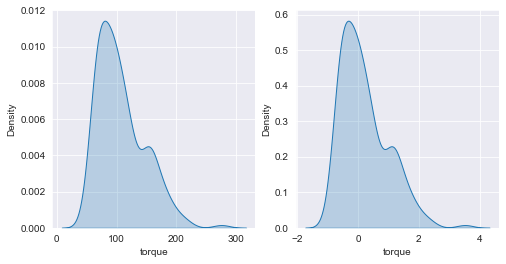

In [66]:
fig,axis=plt.subplots(1,2,figsize=(8,4))
sns.kdeplot(df.torque,shade=True,ax=axis[0])
sns.kdeplot(df_scaled.torque,shade=True,ax=axis[1])

In [26]:
df_with_le.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,highway-mpg,price,stroke_ratio,avg_mpg,make_and_style,torque,PWR (hp/lb),volume_m3,engine_displacement,make_freq
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,27,16500,0.772334,24.0,0,116.59,0.044,0.528020,405.511904,0.010417
1,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,26,16500,1.294776,22.5,1,161.76,0.055,0.587593,469.786125,0.010417
2,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,30,13950,1.065831,27.0,2,97.40,0.044,0.634817,434.780590,0.031250
3,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,22,17450,1.065831,20.0,2,109.81,0.041,0.636735,543.475737,0.031250
4,2,115.0,audi,gas,std,2,sedan,fwd,front,99.8,...,25,15250,1.065831,22.0,2,105.04,0.044,0.624190,543.475737,0.031250


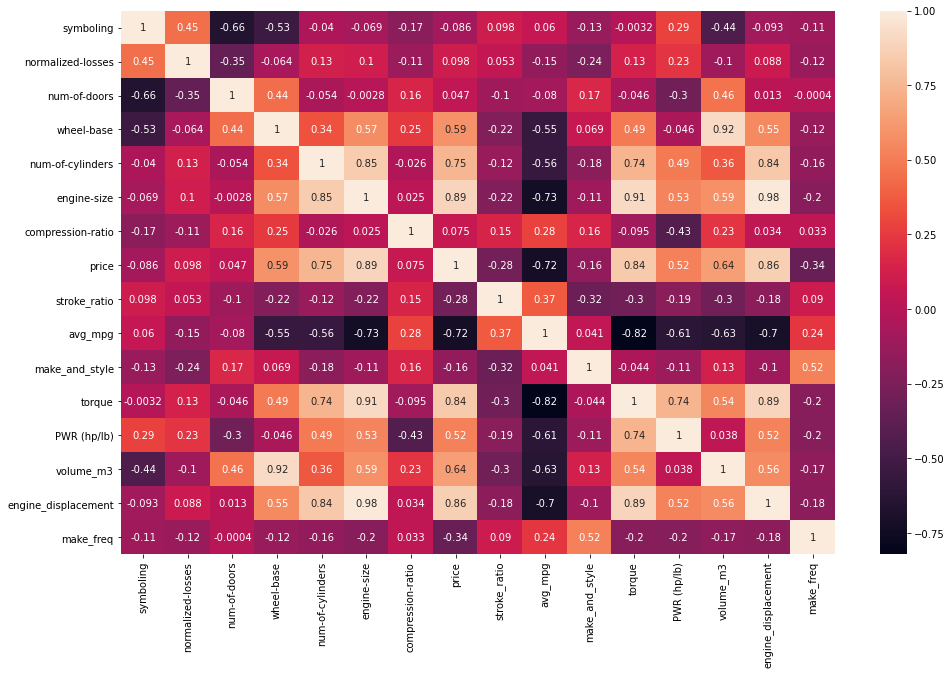

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(df_with_le.drop(['make','body-style','city-mpg','highway-mpg','peak-rpm','horsepower','bore','curb-weight','length','width','height','stroke'],axis=1).corr(),annot=True)
plt.show()

In [28]:
scale=['wheel-base','torque','engine_displacement','avg_mpg','volume_m3','engine-size']

<AxesSubplot:xlabel='engine_displacement', ylabel='Density'>

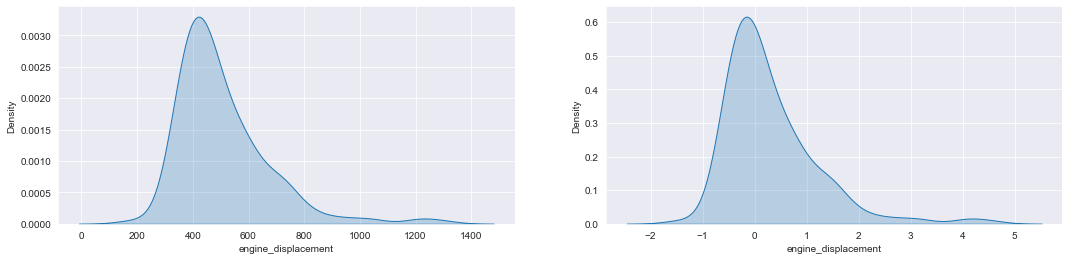

In [71]:
fig,axis=plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(df.engine_displacement,ax=axis[0],shade='dark')
sns.kdeplot(df_scaled.engine_displacement,ax=axis[1],shade='dark')

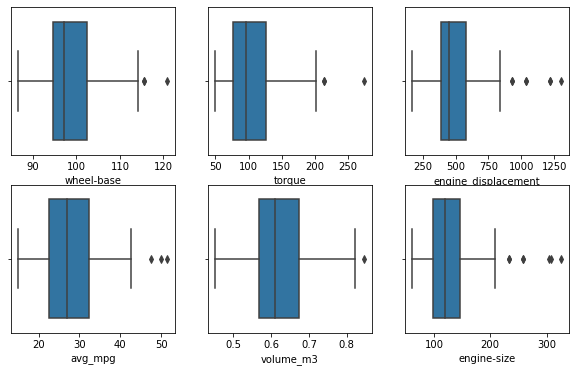

In [30]:
plt.figure(figsize=(10,6))
for i in range(len(scale)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[scale[i]])

## EDA

In [31]:
df_eda=df_with_le.copy()

In [32]:
df['engine-location'].value_counts()

front    189
rear       3
Name: engine-location, dtype: int64

In [33]:
df_eda.isnull().sum()

symboling              0
normalized-losses      0
make                   0
fuel-type              0
aspiration             0
num-of-doors           0
body-style             0
drive-wheels           0
engine-location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type            0
num-of-cylinders       0
engine-size            0
fuel-system            0
bore                   0
stroke                 0
compression-ratio      0
horsepower             0
peak-rpm               0
city-mpg               0
highway-mpg            0
price                  0
stroke_ratio           0
avg_mpg                0
make_and_style         0
torque                 0
PWR (hp/lb)            0
volume_m3              0
engine_displacement    0
make_freq              0
dtype: int64

In [34]:
df_eda.drop(['make','body-style','city-mpg','highway-mpg','peak-rpm','horsepower','bore','curb-weight','length','width','height','stroke'],axis=1,inplace=True)

In [35]:
df_eda.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,...,compression-ratio,price,stroke_ratio,avg_mpg,make_and_style,torque,PWR (hp/lb),volume_m3,engine_displacement,make_freq
0,3,115.0,gas,std,2,rwd,front,88.6,dohc,4,...,9.0,16500,0.772334,24.0,0,116.59,0.044,0.528020,405.511904,0.010417
1,1,115.0,gas,std,2,rwd,front,94.5,ohcv,6,...,9.0,16500,1.294776,22.5,1,161.76,0.055,0.587593,469.786125,0.010417
2,2,164.0,gas,std,4,fwd,front,99.8,ohc,4,...,10.0,13950,1.065831,27.0,2,97.40,0.044,0.634817,434.780590,0.031250
3,2,164.0,gas,std,4,4wd,front,99.4,ohc,5,...,8.0,17450,1.065831,20.0,2,109.81,0.041,0.636735,543.475737,0.031250
4,2,115.0,gas,std,2,fwd,front,99.8,ohc,5,...,8.5,15250,1.065831,22.0,2,105.04,0.044,0.624190,543.475737,0.031250


In [36]:
pd.pivot_table(data=df_eda,index=['fuel-type'],columns=['engine-type'],values='price')

engine-type,dohc,l,ohc,ohcf,ohcv
fuel-type,,,,,
diesel,NaN,15797.000000,16213.071429,NaN,NaN
gas,18536.545455,13792.285714,11116.070866,13738.6,25098.384615


#### symboling shows the risk rating. -3 is safe while +3 is pretty risky

In [37]:
pd.crosstab(index=df_eda['symboling'],columns=df_eda['fuel-type'],values=df_eda.price,aggfunc='mean')

fuel-type,diesel,gas
symboling,,
-2,NaN,15781.666667
-1,23713.600000,15453.352941
0,15503.600000,14352.547170
1,7099.000000,9721.460000
2,8421.666667,10297.750000
3,NaN,18154.545455


### Relatively safer cars have more buyers, naturally

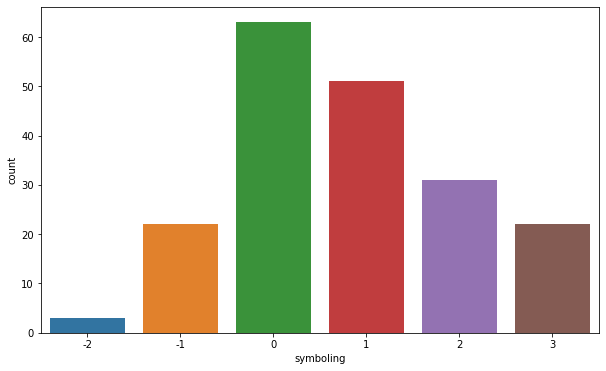

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda,x='symboling')
plt.show()

### As expected, the riskiest cars are ones with highest prices

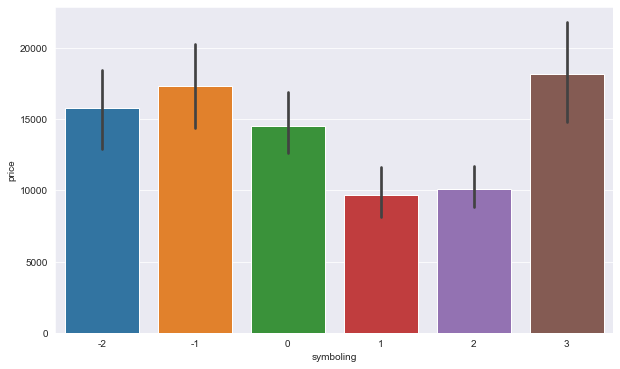

In [331]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_eda,x='symboling',y='price')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


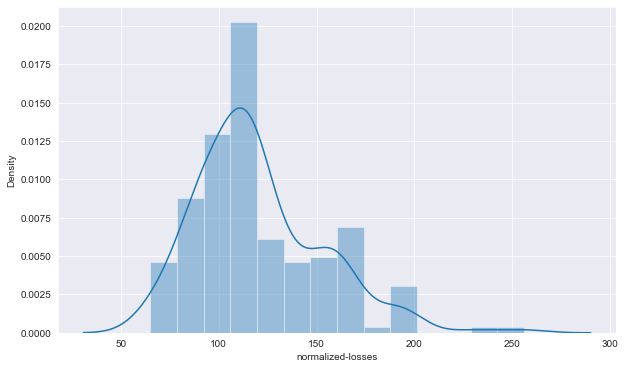

In [336]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df_eda['normalized-losses'])
plt.show()

### As the prices increase, the average mileage decreases

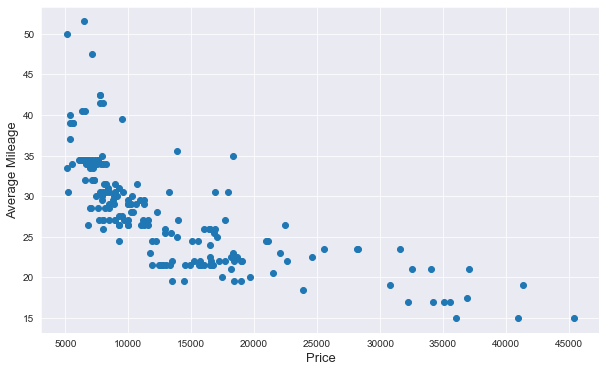

In [580]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_eda,x='price',y='avg_mpg')
plt.ylabel('Average Mileage',size=13)
plt.xlabel('Price',size=13)
plt.show()

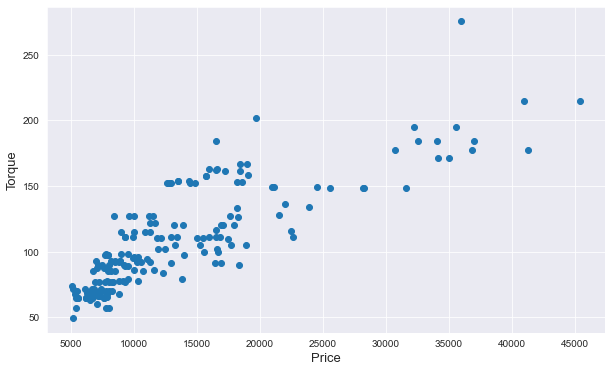

In [581]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_eda,x='price',y='torque')
plt.ylabel('Torque',size=13)
plt.xlabel('Price',size=13)
plt.show()

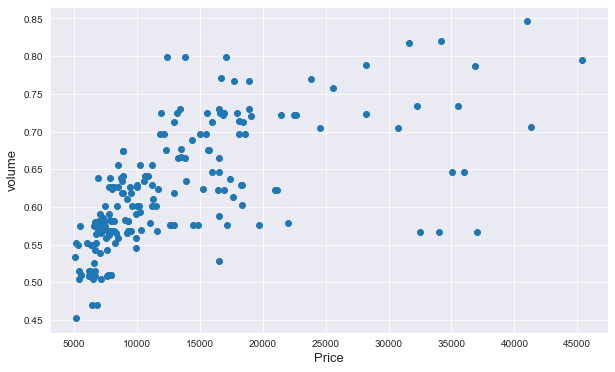

In [585]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_eda,x='price',y='volume_m3')
plt.ylabel('volume',size=13)
plt.xlabel('Price',size=13)
plt.show()

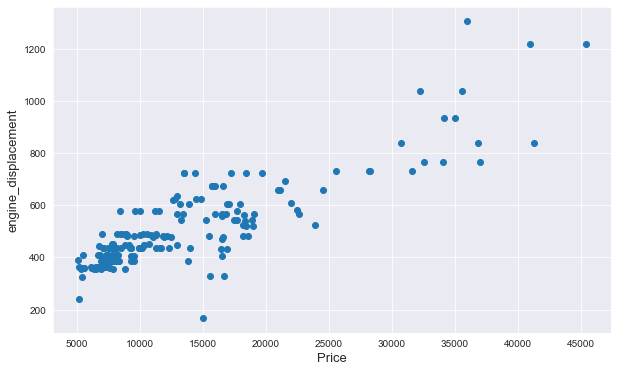

In [889]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_eda,x='price',y='engine_displacement')
plt.ylabel('engine_displacement',size=13)
plt.xlabel('Price',size=13)
plt.show()

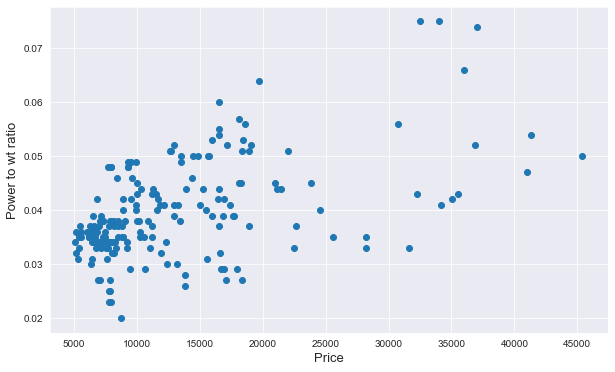

In [601]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_eda,x='price',y='PWR (hp/lb)')
plt.ylabel('Power to wt ratio',size=13)
plt.xlabel('Price',size=13)
plt.show()

###  On an average, 4 door cars are more expensive

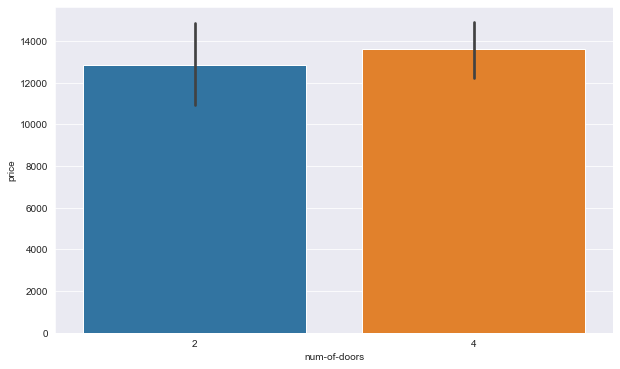

In [349]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_eda,y='price',x='num-of-doors')
plt.show()

### Automobiles with OHCV engine type are most expensive

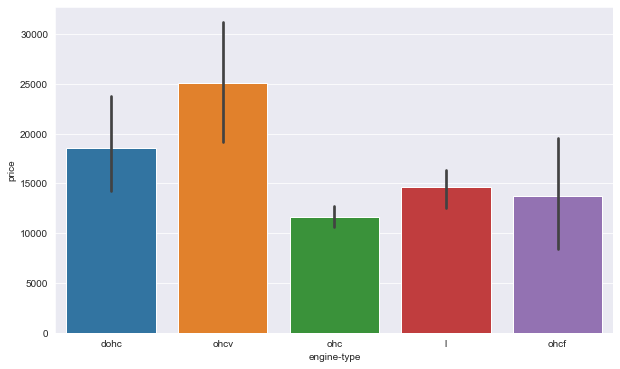

In [350]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_eda,x='engine-type',y='price')
plt.show()

### MPFI anf IDI fuel systems are the most expensive

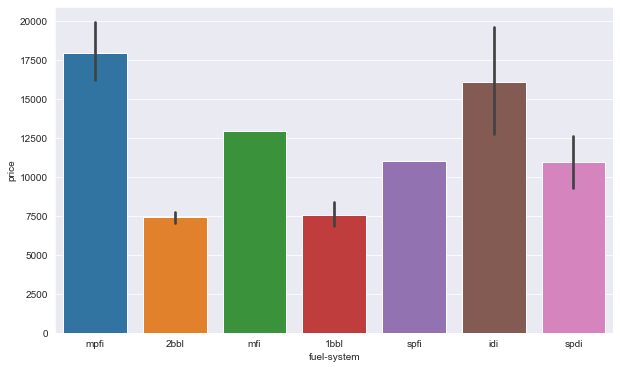

In [351]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_eda,x='fuel-system',y='price')
plt.show()

### More the cylinders, higher the price, except that 8 cylinder engines are the most expensive

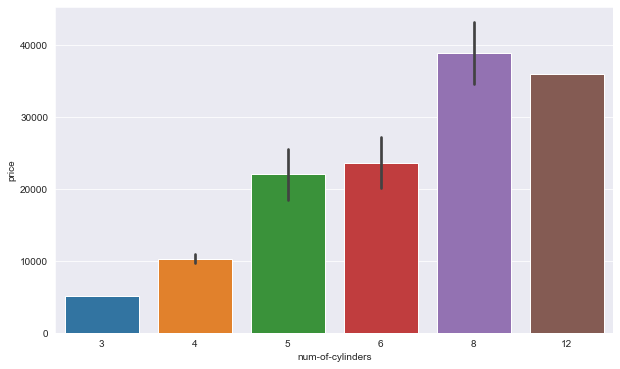

In [352]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_eda,x='num-of-cylinders',y='price')
plt.show()

## One Hot Encoding

In [39]:
df_with_dummies=df_eda.copy()

In [40]:
df_with_dummies=pd.get_dummies(df_with_dummies,columns=['fuel-type','aspiration','engine-type','fuel-system','drive-wheels','engine-location'],drop_first=True)

In [41]:
df_with_dummies.head()

,symboling,normalized-losses,num-of-doors,wheel-base,num-of-cylinders,engine-size,compression-ratio,price,stroke_ratio,avg_mpg,...,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,3,115.0,2,88.6,4,130,9.0,16500,0.772334,24.0,...,0,0,0,0,1,0,0,0,1,0
1,1,115.0,2,94.5,6,152,9.0,16500,1.294776,22.5,...,1,0,0,0,1,0,0,0,1,0
2,2,164.0,4,99.8,4,109,10.0,13950,1.065831,27.0,...,0,0,0,0,1,0,0,1,0,0
3,2,164.0,4,99.4,5,136,8.0,17450,1.065831,20.0,...,0,0,0,0,1,0,0,0,0,0
4,2,115.0,2,99.8,5,136,8.5,15250,1.065831,22.0,...,0,0,0,0,1,0,0,1,0,0


In [42]:
df_final=df_with_dummies.copy()

In [43]:
df_final.head()

,symboling,normalized-losses,num-of-doors,wheel-base,num-of-cylinders,engine-size,compression-ratio,price,stroke_ratio,avg_mpg,...,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,3,115.0,2,88.6,4,130,9.0,16500,0.772334,24.0,...,0,0,0,0,1,0,0,0,1,0
1,1,115.0,2,94.5,6,152,9.0,16500,1.294776,22.5,...,1,0,0,0,1,0,0,0,1,0
2,2,164.0,4,99.8,4,109,10.0,13950,1.065831,27.0,...,0,0,0,0,1,0,0,1,0,0
3,2,164.0,4,99.4,5,136,8.0,17450,1.065831,20.0,...,0,0,0,0,1,0,0,0,0,0
4,2,115.0,2,99.8,5,136,8.5,15250,1.065831,22.0,...,0,0,0,0,1,0,0,1,0,0


## Standardizing the data

In [44]:
df_scaled=df_final.copy()

In [45]:
df_scaled[scale]=RobustScaler().fit_transform(df_scaled[scale])

In [46]:
df_scaled.reset_index(inplace=True)

In [47]:
df_scaled.drop('index',axis=1,inplace=True)

In [48]:
df_scaled.head()

,symboling,normalized-losses,num-of-doors,wheel-base,num-of-cylinders,engine-size,compression-ratio,price,stroke_ratio,avg_mpg,...,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,3,115.0,2,-1.075949,4,0.208333,9.0,16500,0.772334,-0.303797,...,0,0,0,0,1,0,0,0,1,0
1,1,115.0,2,-0.329114,6,0.666667,9.0,16500,1.294776,-0.455696,...,1,0,0,0,1,0,0,0,1,0
2,2,164.0,4,0.341772,4,-0.229167,10.0,13950,1.065831,0.000000,...,0,0,0,0,1,0,0,1,0,0
3,2,164.0,4,0.291139,5,0.333333,8.0,17450,1.065831,-0.708861,...,0,0,0,0,1,0,0,0,0,0
4,2,115.0,2,0.341772,5,0.333333,8.5,15250,1.065831,-0.506329,...,0,0,0,0,1,0,0,1,0,0


## Preparing the model

In [49]:
X=df_scaled.drop(['price','engine-size'],axis=1)
y=df_scaled.price

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X,y)
etr.feature_importances_

array([3.25260657e-03, 5.65415890e-03, 3.36769462e-03, 2.18442175e-02,
       1.26387266e-01, 6.62191907e-03, 7.02711449e-03, 8.56391958e-02,
       1.32549017e-02, 1.64574238e-01, 1.06947262e-02, 2.53897005e-02,
       2.02867679e-01, 4.89336758e-02, 3.31637119e-03, 2.00552100e-02,
       9.88919936e-04, 3.37160157e-03, 6.88850862e-03, 2.40210969e-03,
       5.00901419e-03, 2.90115531e-03, 5.73219753e-05, 3.84236229e-02,
       4.21837818e-04, 8.03373714e-04, 1.15322246e-03, 1.80465818e-01,
       8.23281830e-03])

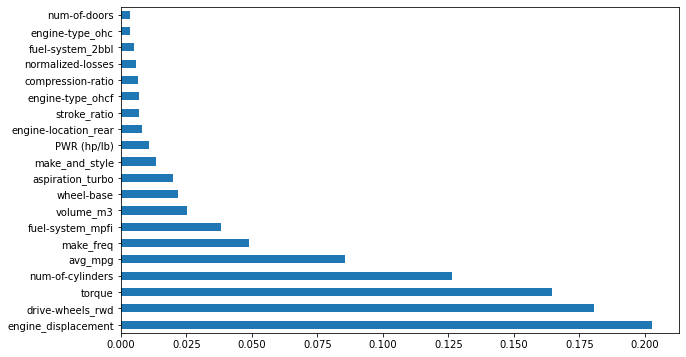

In [51]:
plt.figure(figsize=(10,6))
fi=pd.Series(etr.feature_importances_, index=X.columns)
fi.nlargest(20).plot(kind='barh') 
plt.show()

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((153, 29), (39, 29), (153,), (39,))

In [54]:
cvs(LinearRegression(),x_train,y_train,cv=5).mean(),cvs(RandomForestRegressor(),x_train,y_train,cv=5).mean(),cvs(DecisionTreeRegressor(),x_train,y_train,cv=5).mean()

(0.8493831475091135, 0.9008708639917732, 0.8357163836104882)

In [55]:
rs=RandomizedSearchCV(RandomForestRegressor(),{
    'n_estimators':[100,250,500,1000],
    'max_depth':[None,10,50],
    'n_jobs':[None,2],    
}, cv=5, return_train_score=False, n_iter=5)

rs.fit(x_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_n_estimators','param_max_depth','param_n_jobs','mean_test_score']]

,param_n_estimators,param_max_depth,param_n_jobs,mean_test_score
0,500,None,None,0.902474
1,500,None,2,0.901029
2,1000,None,None,0.900927
3,500,50,2,0.900831
4,250,10,None,0.903524


In [56]:
rf=RandomForestRegressor(n_estimators=1000,n_jobs=2,max_depth=10)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9506894305073124

In [57]:
rf.score(x_train,y_train)

0.9880589165125613

## Ridge Model

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
ridge_model = Ridge()
kfold = KFold(n_splits=5,shuffle=True)

ridge_model.fit(x_train,y_train)
result= cvs(ridge_model,X,y,cv=kfold)
result.mean()


0.8221971747617107

## Lasso Model

In [60]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(max_iter=5000)
kfold = KFold(n_splits=5,shuffle=True)
lasso_model.fit(x_train,y_train)
result =cvs(lasso_model,X,y,cv=kfold)
result.mean()

0.8330996245184368

## Making predictions and plotting it

In [61]:
predictions=rf.predict(x_test)

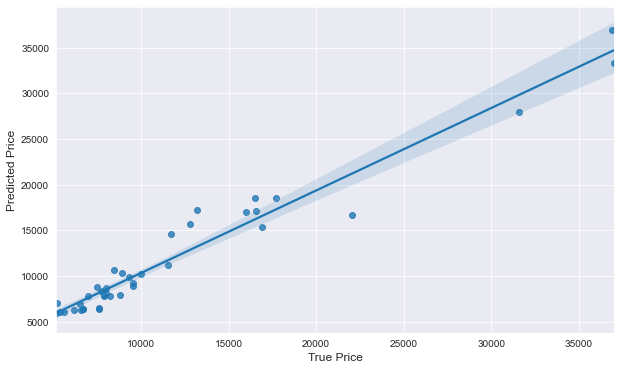

In [62]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.regplot(x=y_test,y=predictions)
plt.xlabel('True Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.show()

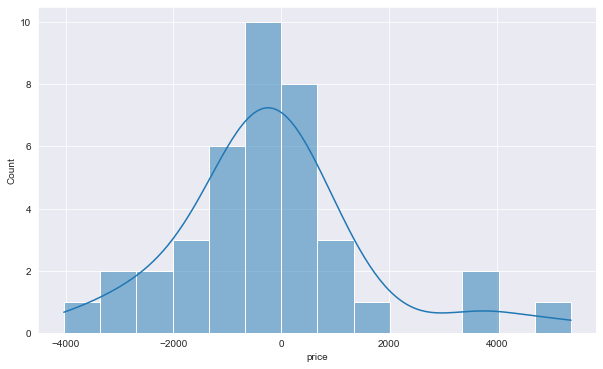

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(y_test-predictions,kde=True)
plt.show()

In [916]:
import pickle
file=open('automobile-1985.pkl','wb')
pickle.dump(rf,file)